<a href="https://colab.research.google.com/github/meitalhp/DataSet_project/blob/main/eda_GET_notentered_afterchange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns
import datetime

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">
<h2 style='color:#2F4F4F; padding-bottom:5px;'><center> Reading the data: </center></h2>

</div>

In [3]:
data=pd.read_csv('/content/ArielU - Rides to Airport no entrance.csv')


In [4]:
data.isnull().sum()

arrived_to_airport_start_interval    0
arrived_to_airport_end_interval      1
minutes_to_order                     1
dtype: int64

In [5]:
data=data.dropna(how='any')


In [6]:
# Sort by the date column
data.sort_values(by='minutes_to_order', inplace=True)

# Print the sorted DataFrame
data

,arrived_to_airport_start_interval,arrived_to_airport_end_interval,minutes_to_order
136572,2023-01-06 04:00:00.000,2023-01-06 04:15:00.000,1.0
60120,2022-10-23 03:30:00.000,2022-10-23 03:45:00.000,1.0
2243,2022-09-03 07:15:00.000,2022-09-03 07:30:00.000,1.0
152801,2023-01-23 05:00:00.000,2023-01-23 05:15:00.000,1.0
91533,2022-11-20 19:15:00.000,2022-11-20 19:30:00.000,1.0
...,...,...,...
149314,2023-01-19 10:45:00.000,2023-01-19 11:00:00.000,239.0
151110,2023-01-21 17:15:00.000,2023-01-21 17:30:00.000,239.0
29898,2022-09-23 09:30:00.000,2022-09-23 09:45:00.000,239.0
94127,2022-11-23 07:15:00.000,2022-11-23 07:30:00.000,239.0


In [7]:
october_not_used=True
if october_not_used==True:
  data['arrived_to_airport_end_interval']=pd.to_datetime(data['arrived_to_airport_end_interval'])
  data=data[data['arrived_to_airport_end_interval']<= '2023-09-30 00:00:00.000']

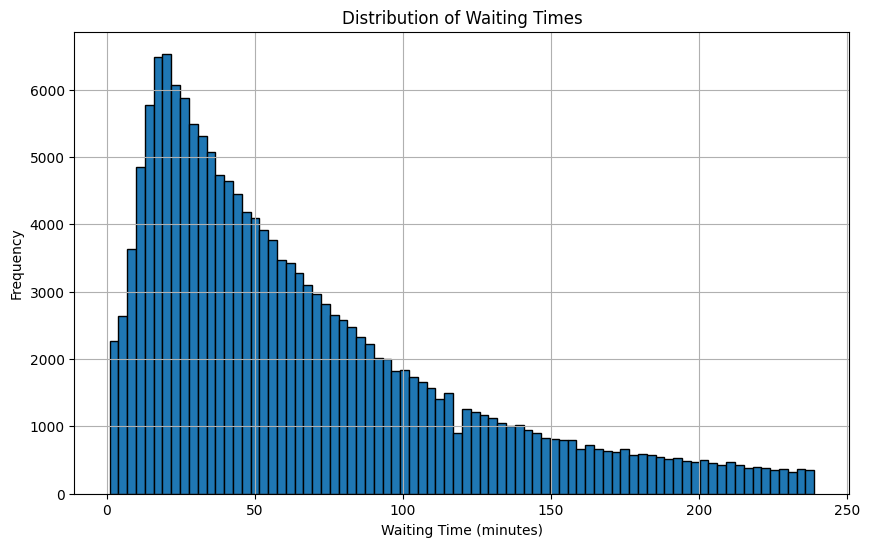

In [8]:
# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(data['minutes_to_order'], bins=80, edgecolor='black')
plt.title('Distribution of Waiting Times')
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
# Calculate the 2.5th and 97.5th percentiles
percentile_2_5 = data['minutes_to_order'].quantile(0.025)
percentile_97_5 = data['minutes_to_order'].quantile(0.975)

# Filter the data to include only the central 95%
filtered_df = data[(data['minutes_to_order'] >= percentile_2_5) & (data['minutes_to_order'] <= percentile_97_5)]
filtered_df

,arrived_to_airport_start_interval,arrived_to_airport_end_interval,minutes_to_order
148628,2023-01-19 00:45:00.000,2023-01-19 01:00:00,6.0
101177,2022-11-30 02:45:00.000,2022-11-30 03:00:00,6.0
111339,2022-12-09 12:15:00.000,2022-12-09 12:30:00,6.0
17718,2022-09-15 06:30:00.000,2022-09-15 06:45:00,6.0
145084,2023-01-15 07:00:00.000,2023-01-15 07:15:00,6.0
...,...,...,...
71690,2022-11-03 06:30:00.000,2022-11-03 06:45:00,208.0
162452,2023-02-02 11:15:00.000,2023-02-02 11:30:00,208.0
26254,2022-09-21 05:45:00.000,2022-09-21 06:00:00,208.0
134948,2023-01-04 08:00:00.000,2023-01-04 08:15:00,208.0


In [10]:

# Convert 'arrived_to_airport_start_interval' to datetime
filtered_df['arrived_to_airport_start_interval'] = pd.to_datetime(filtered_df['arrived_to_airport_start_interval'])

# Extract the hour and date from 'arrived_to_airport_start_interval'
filtered_df['date'] = filtered_df['arrived_to_airport_start_interval'].dt.date
filtered_df['hour'] = filtered_df['arrived_to_airport_start_interval'].dt.hour
filtered_df['minute'] = filtered_df['arrived_to_airport_start_interval'].dt.minute

# Group by 'date' and 'hour' and calculate the average 'minutes_to_order'
grouped_df = filtered_df.groupby(['arrived_to_airport_start_interval','date', 'hour','minute'])['minutes_to_order'].mean().reset_index()

# Rename columns for clarity
grouped_df.columns = ['arrived_to_airport_start_interval','date', 'hour','minute', 'Average_Minutes_to_Order']
grouped_df

<ipython-input-10-f1e712fdb8e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['arrived_to_airport_start_interval'] = pd.to_datetime(filtered_df['arrived_to_airport_start_interval'])
<ipython-input-10-f1e712fdb8e9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = filtered_df['arrived_to_airport_start_interval'].dt.date
<ipython-input-10-f1e712fdb8e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,arrived_to_airport_start_interval,date,hour,minute,Average_Minutes_to_Order
0,2022-09-01 00:00:00,2022-09-01,0,0,33.375000
1,2022-09-01 00:15:00,2022-09-01,0,15,53.850000
2,2022-09-01 00:30:00,2022-09-01,0,30,35.562500
3,2022-09-01 00:45:00,2022-09-01,0,45,68.750000
4,2022-09-01 01:00:00,2022-09-01,1,0,53.562500
...,...,...,...,...,...
14453,2023-02-04 01:30:00,2023-02-04,1,30,28.400000
14454,2023-02-04 01:45:00,2023-02-04,1,45,51.333333
14455,2023-02-04 02:00:00,2023-02-04,2,0,39.714286
14456,2023-02-04 02:15:00,2023-02-04,2,15,71.666667


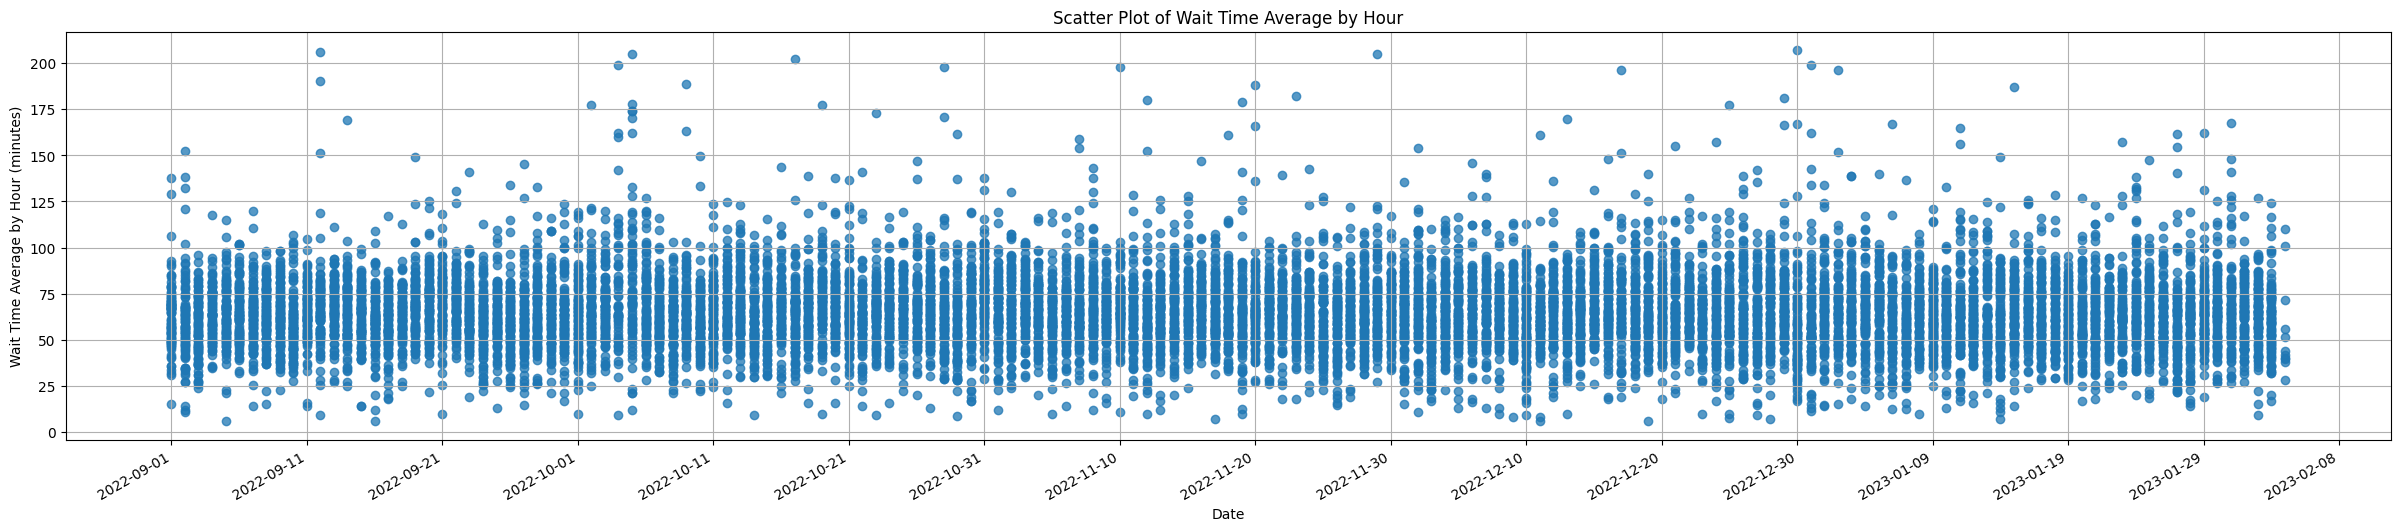

In [11]:
import matplotlib.dates as mdates

plt.figure(figsize=(30, 6))

plt.scatter(grouped_df['date'], grouped_df['Average_Minutes_to_Order'], alpha=0.75)

plt.xlabel('Date')
plt.ylabel('Wait Time Average by Hour (minutes)')
plt.title('Scatter Plot of Wait Time Average by Hour')
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # תווית כל 10 ימים
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.gcf().autofmt_xdate()

plt.show()

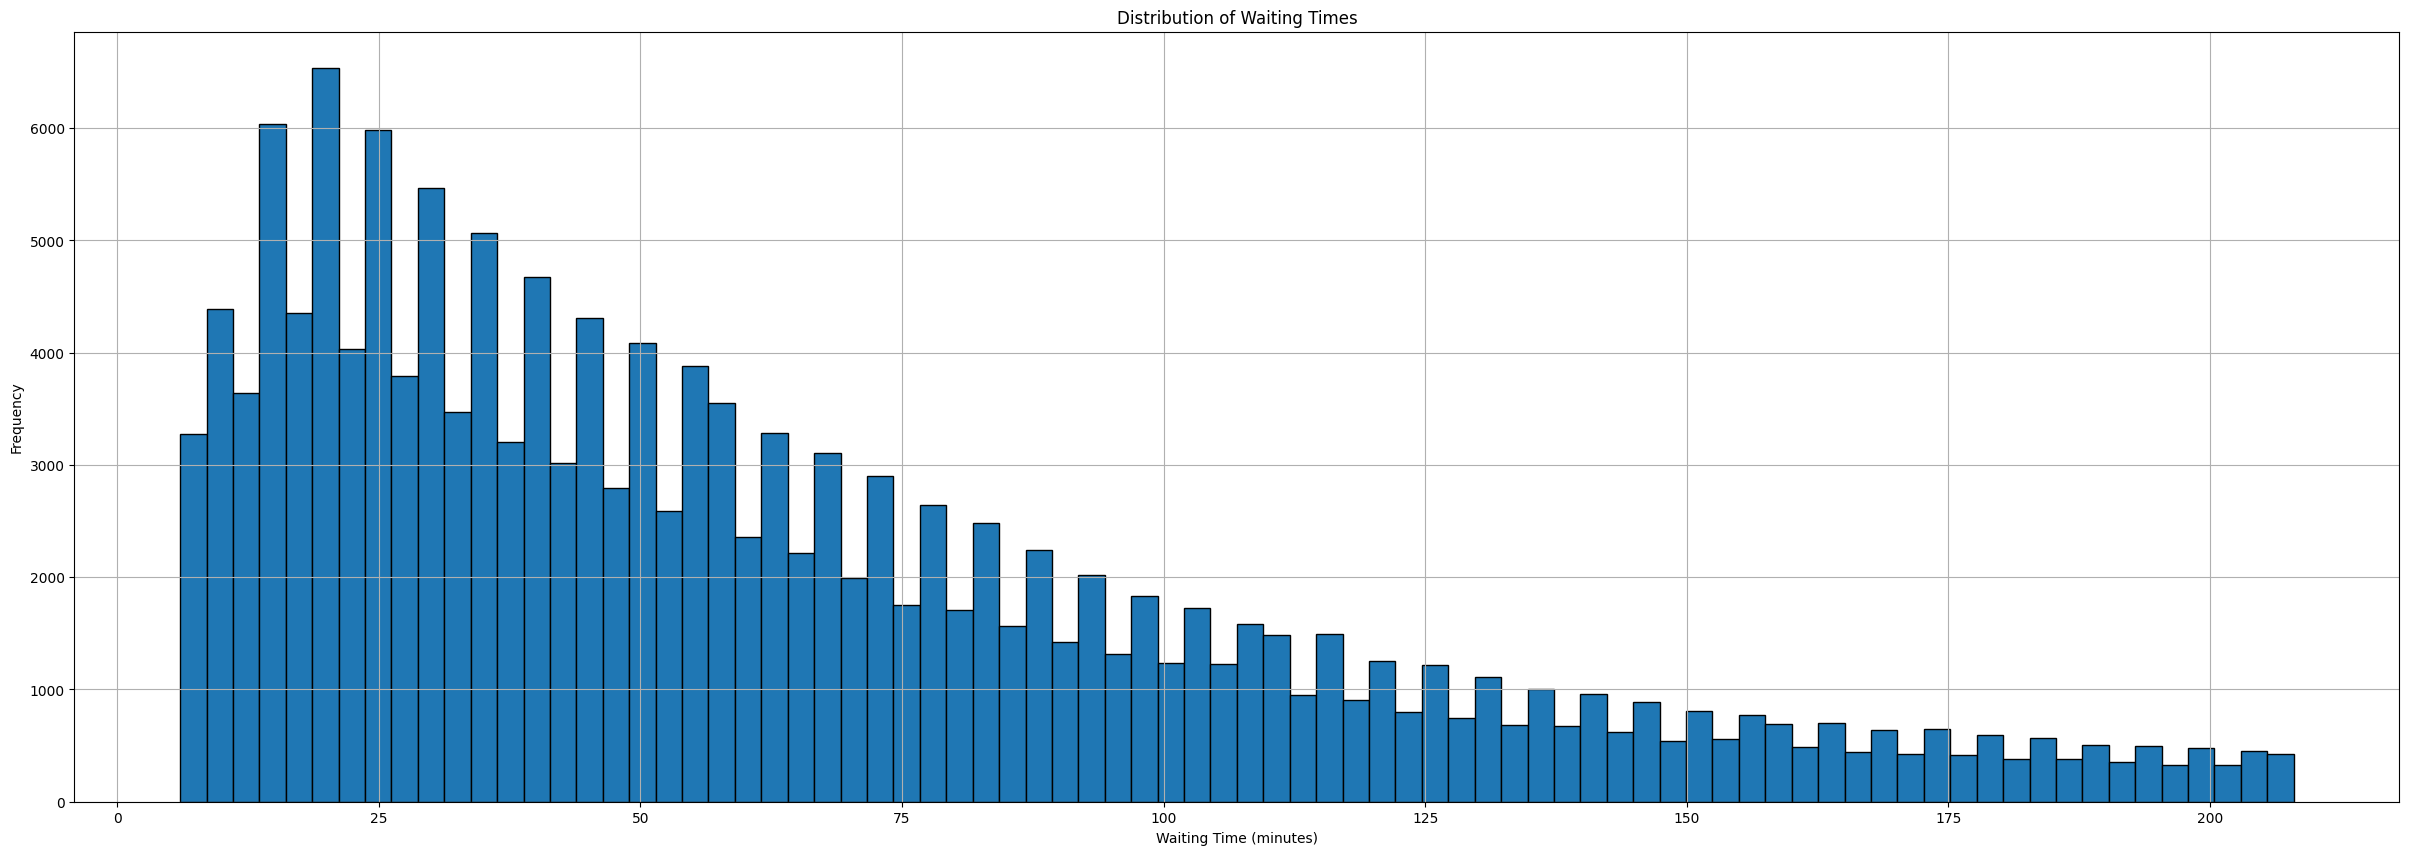

In [12]:
# Plotting again the distribution
plt.figure(figsize=(30, 10))
plt.hist(filtered_df['minutes_to_order'], bins=80, edgecolor='black')
plt.title('Distribution of Waiting Times')
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [13]:
# Group by 'date' and 'hour' and calculate the average 'minutes_to_order'
grouped_h = filtered_df.groupby('hour')['minutes_to_order'].mean().reset_index()


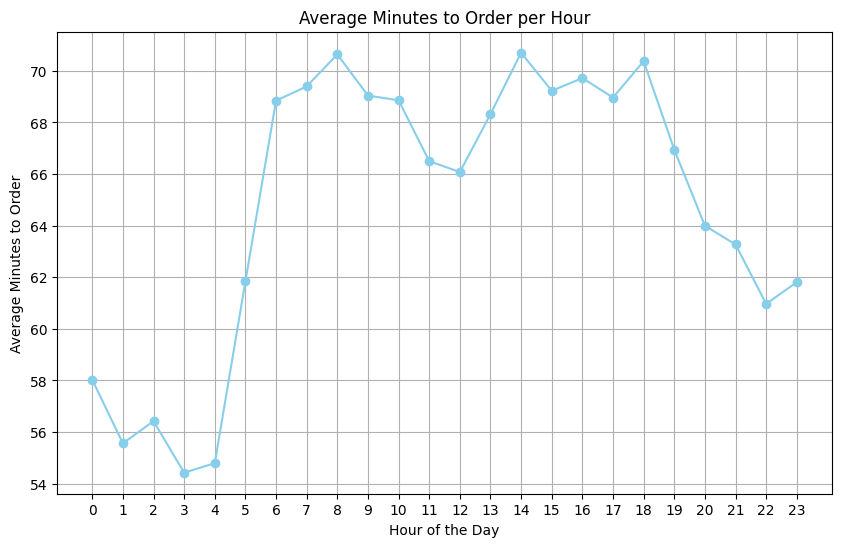

In [14]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(grouped_h.hour, grouped_h.minutes_to_order, marker='o', linestyle='-', color='skyblue')
plt.title('Average Minutes to Order per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Minutes to Order')
plt.xticks(range(24))
plt.grid(True)
plt.show()

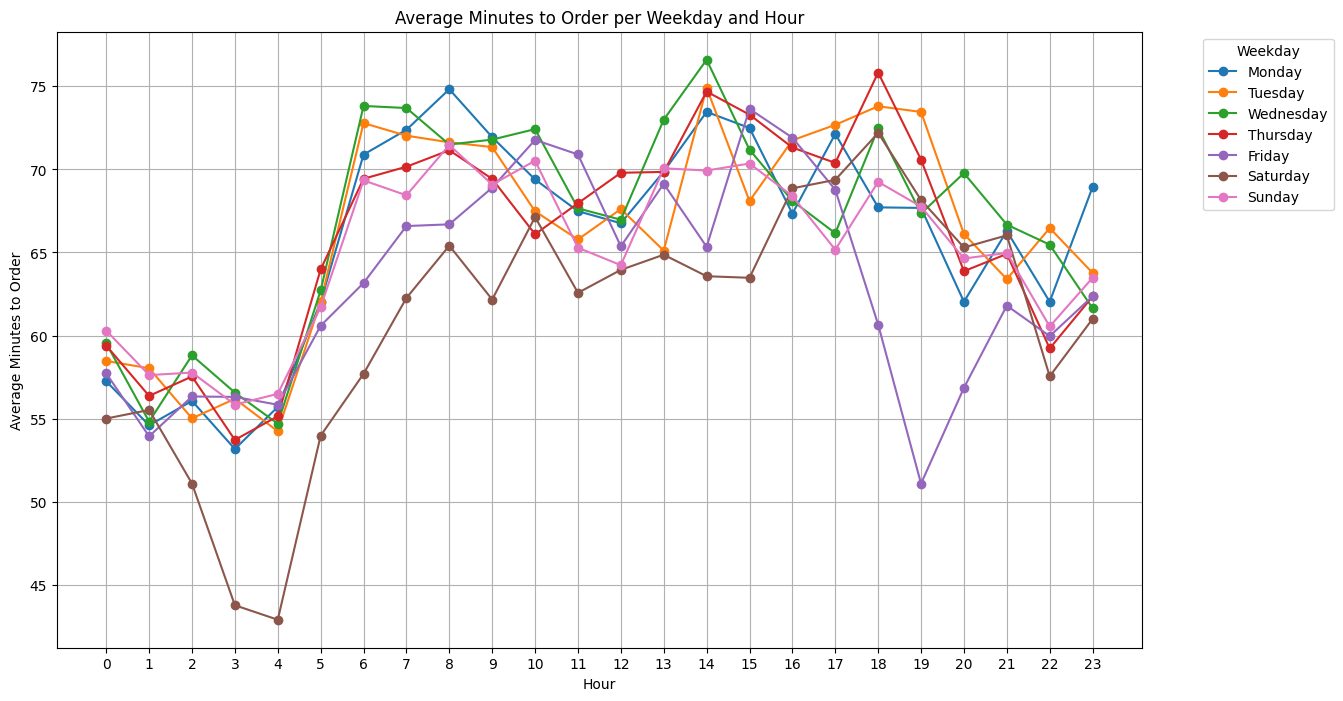

In [15]:
grouped_df['date'] = pd.to_datetime(grouped_df['date'])

#extract the weekday
grouped_df['weekday'] = grouped_df['date'].dt.day_name()

# Group by 'hour' and 'weekday' and calculate the average 'Average_Minutes_to_Order'
grouped_df_weekly = grouped_df.groupby(['hour', 'weekday'], as_index=False)['Average_Minutes_to_Order'].mean()

# Pivot the DataFrame to get a matrix-like DataFrame for plotting
pivot_df = grouped_df_weekly.pivot(index='hour', columns='weekday', values='Average_Minutes_to_Order')

# Reorder columns to ensure the correct order of weekdays
pivot_df = pivot_df[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# Plotting the results
plt.figure(figsize=(14, 8))
for day in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[day], marker='o', linestyle='-', label=day)

plt.title('Average Minutes to Order per Weekday and Hour')
plt.xlabel('Hour')
plt.ylabel('Average Minutes to Order')
plt.xticks(range(24))
plt.legend(title='Weekday', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


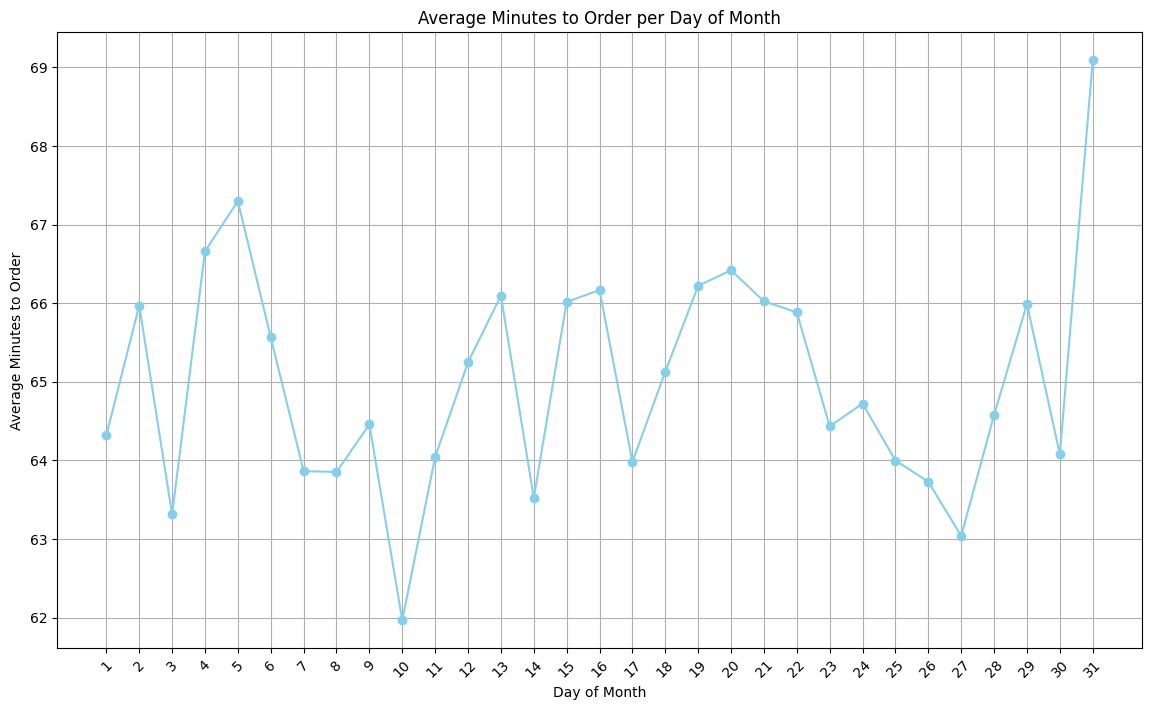

In [16]:

# Extract the day of the month
grouped_df['day'] = grouped_df['date'].dt.day

# Group by 'day' and calculate the average 'Average_Minutes_to_Order'
daily_avg = grouped_df.groupby('day')['Average_Minutes_to_Order'].mean()

# Plotting the results
plt.figure(figsize=(14, 8))
plt.plot(daily_avg.index, daily_avg.values, marker='o', linestyle='-', color='skyblue')
plt.title('Average Minutes to Order per Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Average Minutes to Order')
plt.xticks(range(1, 32), rotation=45)
plt.grid(True)
plt.show()

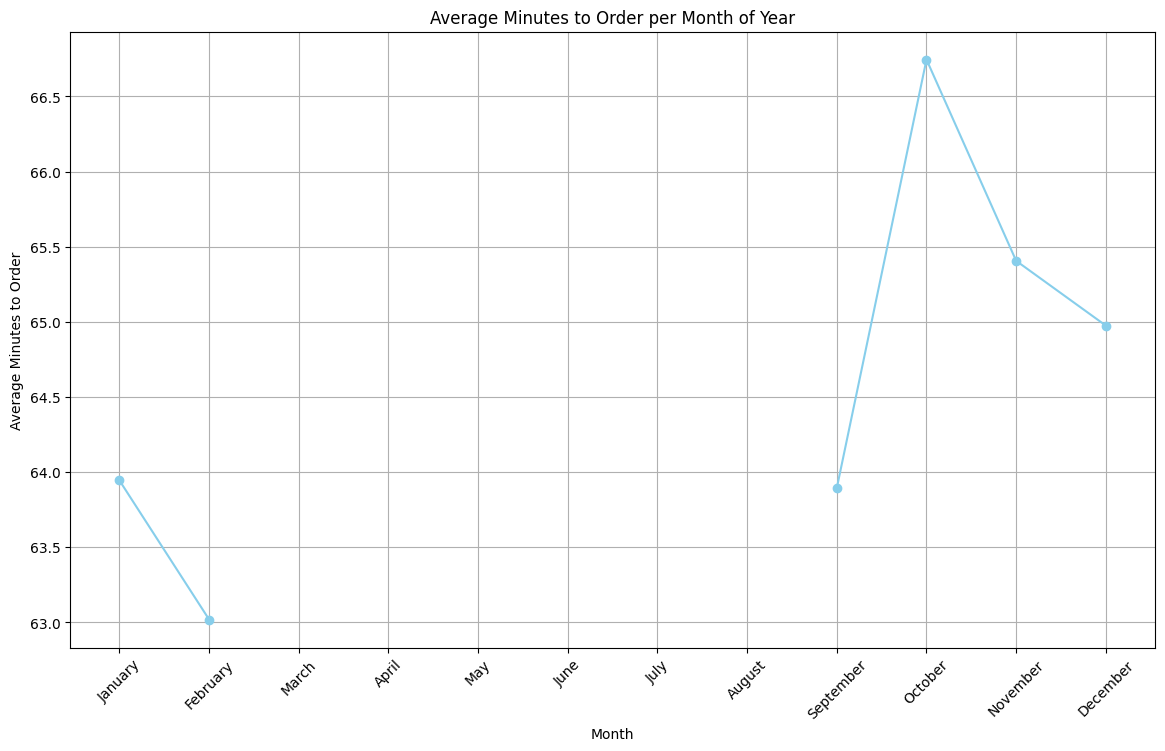

In [17]:
# Extract the month of the year
grouped_df['month'] = grouped_df['date'].dt.month_name()

# Group by 'month' and calculate the average 'Average_Minutes_to_Order'
monthly_avg = grouped_df.groupby('month')['Average_Minutes_to_Order'].mean()

# Reorder the months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg = monthly_avg.reindex(months_order)

# Plotting the results
plt.figure(figsize=(14, 8))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', color='skyblue')
plt.title('Average Minutes to Order per Month of Year')
plt.xlabel('Month')
plt.ylabel('Average Minutes to Order')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [18]:
grouped_df.to_csv('clean_data_not_entered.csv',index=False)